<a href="https://colab.research.google.com/github/brash99/phys441/blob/master/TravelingWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convection in 2D


### The 2D Convection Equation with Constant Wave Speed

\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} + c \frac{\partial u}{\partial y}= 0
\end{equation}

where $c$ is the speed of travel of the wave.  We use the forward difference for the time derivative, and the backward difference approximation for the first order spatial derivatives. 

\begin{equation}
\frac{u_{ij}^{n+1} -  u_{ij}^n}{\Delta t} + c \left( \frac{u^n_{ij} - u^n_{(i-1)j}}{\Delta x} \right) + c \left( \frac{u^n_{ij} - u^n_{i(j-1)}}{\Delta y} \right) = 0
\end{equation}

\begin{equation}
u_{ij}^{n+1} =  u_{ij}^n + \frac{c \Delta t}{\Delta x} \left( u^n_{ij} - u^n_{(i-1)j} \right) + \frac{c \Delta t}{\Delta y} \left( u^n_{ij} - u^n_{(i-1)j} \right)
\end{equation}

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy as np                            #here we load numpy
from matplotlib import pyplot as plt     #here we load matplotlib
import time, sys                         #and load some utilities

In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

In [3]:
xrange = 2.0
yrange = 2.0

nx = 81
ny = 81
nt = 100

dx = xrange / (nx-1)
dy = xrange / (nx-1)
c = 1.0
sigma = .2
dt = sigma * dx

trange = dt*(nt-1)

x = np.linspace(0,xrange,nx)
y = np.linspace(0,yrange,ny)

print ("Stability criterion x = ",c*dt/dx)
print ("Stability criterion y = ",c*dt/dy)

Stability criterion x =  0.20000000000000004
Stability criterion y =  0.20000000000000004


In [4]:
# Set the wavefunction equal to all ones, initially
u = np.ones((nx,ny))     

# Test Case 1: Rectangular Pulse
u[int(.5 / dx):int(1 / dx + 1),int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 in each of x and y

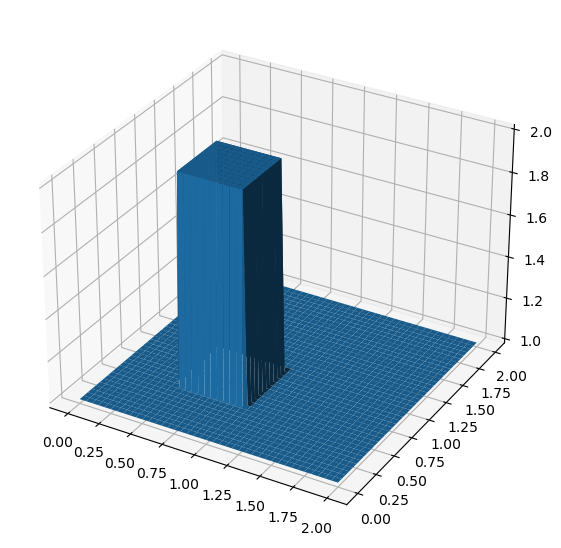

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11, 7), dpi=100)  # first, create a figure object of a certain size and resolutin
ax = fig.gca(projection='3d')               # next, create an axes object, and specify that it is 3D       
X, Y = np.meshgrid(x, y)                    # next, convert the x and y arrays into a 2D meshgrid for plotting        
surf = ax.plot_surface(X, Y, u[:])          # finally, plot the surface.

In [6]:
un = np.ones((nx,ny)) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):
        for j in range(1,ny):
            u[i,j] = un[i,j] - c * dt / dx * (un[i,j] - un[i-1,j]) - c * dt / dy * (un[i,j] - un[i,j-1])
    #
    # Impose boundary conditions
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

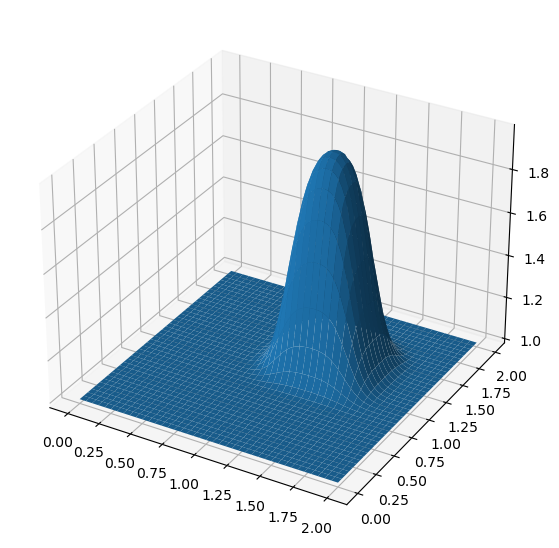

In [7]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:])

In [8]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

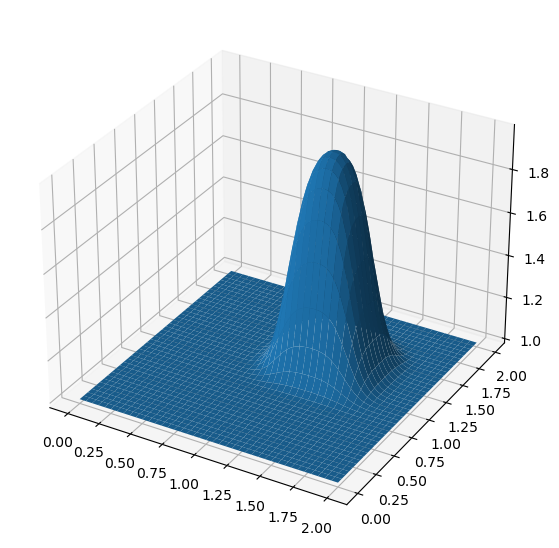

In [9]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:])